In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00


In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Check if Cuda is available
import torch
print(torch.cuda.is_available())

True


In [ ]:
#Import necessary libraries and modules
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import pandas as pd

In [ ]:
# Set up device, load model, and initialize tokenizer
device = 0 if torch.cuda.is_available() else -1
model = AutoModelForTokenClassification.from_pretrained("/content/drive/MyDrive/saved_final_model_ner").to(device)
df1 = pd.read_csv('/content/drive/MyDrive/NER_refugee.tsv', sep='\t', header = 0)
tokenizer = AutoTokenizer.from_pretrained("Davlan/distilbert-base-multilingual-cased-ner-hrl")
nlp = pipeline("ner", model=model, tokenizer=tokenizer, device=device)


In [ ]:
# Extract named entities from the text and merge tokens
persons = []
locations = []
organizations = []

current_person = ""
current_location = ""
current_organization = ""

for test in df1["Test"]:
    ner_results = nlp(test)
    # Extract named entities and merge tokens
    for entity in ner_results:
        if entity["entity"] == "I-PER" or entity["entity"] == "B-PER":
            if current_person and entity["entity"] == "I-PER":
                current_person += " " + entity["word"]
            else:
                if current_person:
                    persons.append(current_person)
                current_person = entity["word"]

        elif entity["entity"] == "I-LOC" or entity["entity"] == "B-LOC":
            if current_location and entity["entity"] == "I-LOC":
                current_location += " " + entity["word"]
            else:
                if current_location:
                    locations.append(current_location)
                current_location = entity["word"]

        elif entity["entity"] == "I-ORG" or entity["entity"] == "B-ORG":
            if current_organization and entity["entity"] == "I-ORG":
                current_organization += " " + entity["word"]
            else:
                if current_organization:
                    organizations.append(current_organization)
                current_organization = entity["word"]

# Append the last entities if they exist
if current_person:
    persons.append(current_person)
if current_location:
    locations.append(current_location)
if current_organization:
    organizations.append(current_organization)
# Define utility functions to merge consecutive tokens starting with "##"
def merge_tokens(tokens):

    merged_tokens = []
    current_token = ""

    for token in tokens:
        if token.startswith("##"):
            current_token += token[2:]
        else:
            if current_token:
                merged_tokens.append(current_token)
                current_token = ""
            if not token.startswith("##"):
                current_token = token

    if current_token:
        merged_tokens.append(current_token)

    return merged_tokens

# Merge consecutive tokens in strings
def merge_tokens_in_strings(input_list):
    merged_list = []

    for item in input_list:
        current_token = ""
        merged_string = ""
        split_tokens = item.split()

        for token in split_tokens:
            if token.startswith("##"):
                current_token += token[2:]
            else:
                if current_token:
                    merged_string += current_token + " "
                    current_token = ""
                if not token.startswith("##"):
                    current_token = token

        if current_token:
            merged_string += current_token

        merged_list.append(merged_string)

    return merged_list


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1081: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [ ]:
#Apply merge function
persons=merge_tokens(persons)
locations=merge_tokens(locations)
organizations=merge_tokens(organizations)


In [ ]:
#Apply merge tokens in strings function

persons = merge_tokens_in_strings(persons)
locations = merge_tokens_in_strings(locations)
organizations = merge_tokens_in_strings(organizations)

In [ ]:
from collections import Counter
# Count the occurrences of each named entity
counts_per = Counter(persons)
counts_loc = Counter(locations)
counts_org = Counter(organizations)
#Print the results of counted entities
print(counts_per)
print(counts_loc)
print(counts_org)

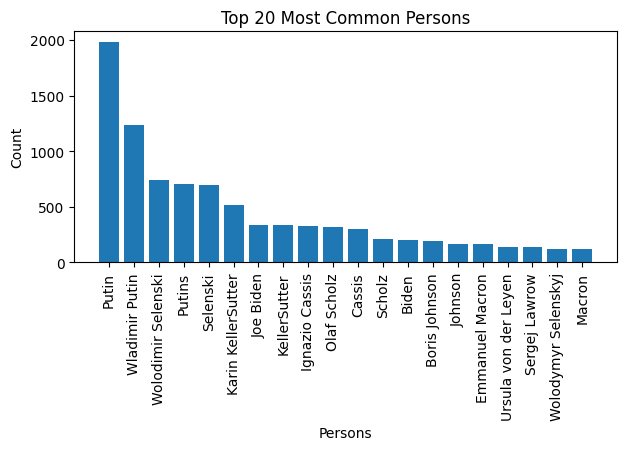

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the 20 most common items
top_20_items = counts_per.most_common(20)

# Unzip the items and counts into two lists
items, counts = zip(*top_20_items)
# Create a bar plot
plt.figure(figsize=(7,3))
plt.bar(items, counts)
plt.xlabel('Persons')
plt.ylabel('Count')
plt.title('Top 20 Most Common Persons')
plt.xticks(rotation=90)
plt.show()

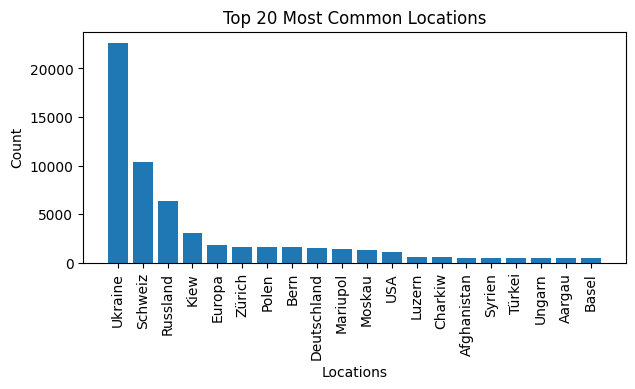

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the 20 most common items
top_20_items = counts_loc.most_common(20)

# Unzip the items and counts into two lists
items, counts = zip(*top_20_items)
# Create a bar plot
plt.figure(figsize=(7,3))
plt.bar(items, counts)
plt.xlabel('Locations')
plt.ylabel('Count')
plt.title('Top 20 Most Common Locations')
plt.xticks(rotation=90)
plt.show()

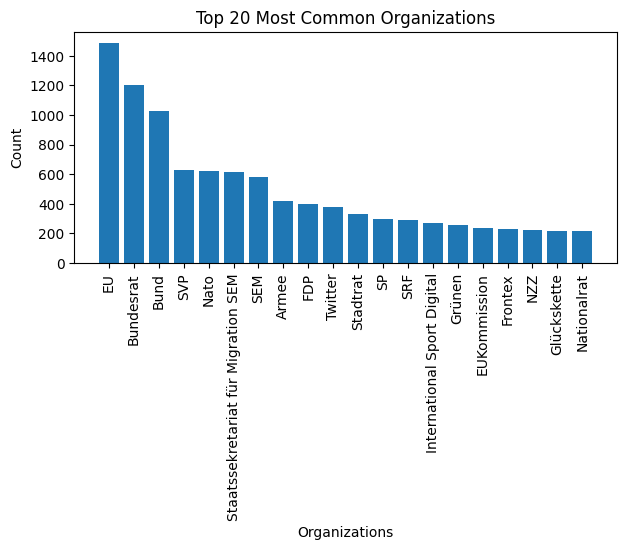

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Get the 20 most common items
top_20_items = counts_org.most_common(20)

# Unzip the items and counts into two lists
items, counts = zip(*top_20_items)
# Create a bar plot
plt.figure(figsize=(7,3))
plt.bar(items, counts)
plt.xlabel('Organizations')
plt.ylabel('Count')
plt.title('Top 20 Most Common Organizations')
plt.xticks(rotation=90)
plt.show()